In [2]:
import numpy as np
from collections import Counter 

## Algorithm

In [3]:
def mode(labels):
    return Counter(labels).most_common(1)[0][0]

In [36]:
def label_probabilities(labels):
    num_labels = len(labels)
    count = dict(Counter(labels))
    keys = count.keys()
    values = np.array(list(count.values()))
    values = values / num_labels
    
    return dict(zip(keys, values))
    

In [97]:
def KNN(x, data, labels, k, method = 'classification'):
  
    # Assert that the data is a numpy array
    assert type(data) == np.ndarray

    # Find the distance between each data point and the data of interest.
    distances = np.linalg.norm(data - x, axis = 1)
    
    # Finding the closest k neighbours and their associated labels
    closest_k = np.argsort(distances)[:k]
    closest_labels = labels[closest_k]

    if method == "classification":
        return mode(closest_labels)
    
    else: # regression 
        return label_probabilities(closest_labels)    

### Demonstration on Data

In [58]:
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt

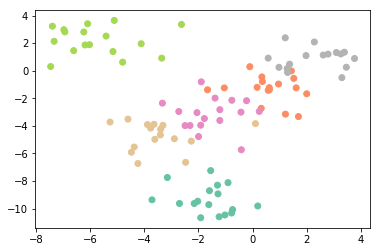

In [151]:
# Generating data
X, y = make_blobs(n_samples=100, centers=6, n_features=2, random_state= 2)

colour_map = 'Set2'
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = colour_map)
x_low, x_high = plt.xlim()
y_low, y_high = plt.ylim()
plt.show()

In [152]:
x_values = np.arange(x_low, x_high, 0.025);
y_values = np.arange(y_low, y_high, 0.025);
xx, yy = np.meshgrid(x_values, y_values)
xy_pairs = np.dstack([xx, yy]).reshape(-1, 2)

In [153]:
k_neighbours = 4
predicted_labels = np.zeros(len(xy_pairs))
for i, data_point in enumerate(xy_pairs):
    predicted_labels[i] = KNN(data_point, X, y, k = k_neighbours)

In [154]:
z = predicted_labels.reshape(xx.shape)

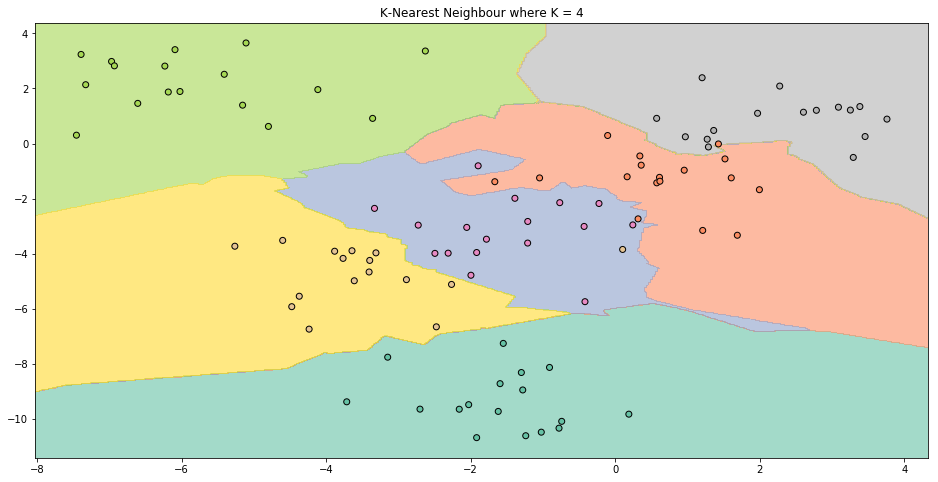

In [155]:
plt.figure(figsize = (16, 8))
plt.contourf(xx, yy, z, alpha = 0.6, cmap = colour_map)
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', cmap = colour_map)
plt.title("K-Nearest Neighbour where K = {}".format(k_neighbours))
plt.show()